# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')

In [2]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [3]:
# Check if all Boroughs and Community Districts are represented in the Data 
data['Borough'].unique()

array(['BROOKLYN', 'Unspecified', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'QUEENS'], dtype=object)

In [4]:
data['Community Board'].unique()

array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

### All five boroughs are included, but it is not clear whether all the community boards are included. In both variables, there are "unspecified" levels that need to be omitted. 

In [5]:
len(data['Borough'].unique())

6

In [6]:
data = data[data['Borough'] != 'Unspecified']
len(data['Community Board'].unique())# How many unique values do we have? 

76

In [7]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.
data = data[data['Community Board'].str.contains("Unspecified") == False]
len(data['Community Board'].unique())

71

### There are still 71 unique values. 

In [9]:
# Check for duplicates? Are these plausible?
data_uni = data.drop_duplicates()
print ('Number of duplicates: {}'.format(len(data) - len(data_uni)))

Number of duplicates: 0


In [10]:
# What about missing values? Can you detect any patterns? 
data_uni.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                        365691
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                          30678
Location Type                     2113493
Incident Zip                        20426
Incident Address                  1482870
Street Name                       1482908
Cross Street 1                    1790986
Cross Street 2                    1795931
Intersection Street 1             6712031
Intersection Street 2             6711941
Address Type                        91645
City                                20217
Landmark                          8116096
Facility Type                     6516063
Status                                  0
Due Date                          5334673
Resolution Description            3024464
Resolution Action Updated Date     157662
Community Board                   

### There are many missing values for some variables. 

In [ ]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

### It is possible to fill some of the missing values but community boards do not have missing values here, filling missings does not help drop or identify the wrong observations. 

In [14]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 
# Drop the marked districts
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
# Safe reduced data frame (Community District level)

community = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/w3c6-35wg/1422440891/w3c6-35wg')

Borough, Number, Board = [],[],[]

for i in range(len(community)):
    Borough.append(community['JURISDICTION NAME'][i].split(" ")[0])
    Number.append(community['JURISDICTION NAME'][i].split(" ")[2])
    Board.append(str('{:02d}'.format(int(Number[i])) + ' ' + Borough[i].upper()))

data = data[data['Community Board'].isin(Board)]
len(data['Community Board'].unique())

56

### Instead of use ranks, I found a data that has all the actual community boards, although named in a format different from the way 311 data employs. I changed the format and stored those values, then dropped all the observations that do not match in the 311 data. The reason why it returns 56 unique values is because there are 3 community districts named "XX Richmond", with "XX" being the district numbers, and there is no such record matching them in the 311 data. 

In [19]:
complaints = data.groupby('Community Board', as_index=False).count().iloc[:,:2]

In [20]:
complaints.columns = [['Community Board', 'Complaints']]
complaints.head()

,Community Board,Complaints
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,02 BRONX,60257


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [21]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [22]:
df_pop.head()
# Check variables in file

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [23]:
# How many community districts are in file? 
len(df_pop['cd_id'].unique())

59

In [24]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
# Save data frame
complaints_demo = df_pop[['cd_id', '% Total Population: 18 to 24 Years']]
complaints_demo.columns = ['cd_id', 'young']
complaints_demo.head()

,cd_id,young
0,BX08,10.73
1,BX12,11.35
2,BX10,8.62
3,BX11,8.10
4,BX03,14.24


### I think young people age between 18 and 24 tend to complain more because older people are used to the problems and they have better things to do. 

In [26]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [27]:
# Check variables in file
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [28]:
# How many community districts are in file? 
len(df_infr['Qualifying Name'].unique())

55

In [34]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
internet = df_infr.iloc[:,[2,4,5]]
internet.columns = ['Community Name', 'low_internet_conection', 'high_internet_connection']
internet['with_internet'] = internet['low_internet_conection'] + internet['high_internet_connection']
internet = internet.iloc[:,[0,3]]
internet.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Community Name,with_internet
0,"NYC-Bronx Community District 8--Riverdale, New...",32239
1,"NYC-Bronx Community District 12--Wakefield, Ne...",32421
2,"NYC-Bronx Community District 10--Co-op City, N...",32887
3,NYC-Bronx Community District 11--Pelham Parkwa...,32144
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",35591


In [ ]:
# Aggregate internet type by high and low connections

In [ ]:
# Save data frame 

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [35]:
# Harmonize identifier of dataframe 1
complaints = complaints.reset_index()
complaints["Community Board"].unique()

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS', '02 BRONX',
       '02 BROOKLYN', '02 MANHATTAN', '02 QUEENS', '03 BRONX',
       '03 BROOKLYN', '03 MANHATTAN', '03 QUEENS', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN'], dtype=object)

In [38]:
cd_id = {'BRONX': 'BX', 'BROOKLYN': 
         'BK', 'MANHATTAN': 'MN', 'QUEENS': 'QN', 'STATEN ISLAND': 'SI'}


complaints['cd_num'] = complaints['Community Board'].str[:2]
complaints['cd_bor'] = complaints['Community Board'].str[3:]


complaints.replace({'cd_bor': cd_id}, inplace=True)
complaints['cd_id'] = complaints.cd_bor + complaints.cd_num
complaints_new = complaints[["cd_id", "Complaints"]]

complaints_new.head()

,cd_id,Complaints
0,BX01,74631
1,BK01,185057
2,MN01,77974
3,QN01,171484
4,BX02,60257


In [40]:
# Harmonize identifier of dataframe 2
complaints_demo['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [42]:
complaints_demo.replace('MN11111', 'MN11', inplace=True)
complaints_demo['cd_id'].unique()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [44]:
# Harmonize identifier of dataframe 3
cd_id1 = {'Bronx': 'BX', 'Brooklyn': 'BK', 'Manhattan': 'MN', 'Queens': 'QN', 'Staten': 'SI'}

internet['cd_bor'] = internet['Community Name'].str.extract('(?<=^....)([a-zA-Z]+)', expand=True)
internet['cd_num'] = internet['Community Name'].str.extract('([0-9]+)', expand=True)

internet['cd_num'] = internet['cd_num'].apply(lambda x: '{0:0>2}'.format(x))
internet.replace({'cd_bor': cd_id1}, inplace=True)
internet['cd_id'] = internet.cd_bor + internet.cd_num

In [46]:
internet.head()

,Community Name,with_internet,cd_bor,cd_num,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...",32239,BX,08,BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...",32421,BX,12,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",32887,BX,10,BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,32144,BX,11,BX11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",35591,BX,03,BX03


In [47]:
internet_final = internet.iloc[:,[2,4,1]]
internet_final.head()

,cd_bor,cd_id,with_internet
0,BX,BX08,32239
1,BX,BX12,32421
2,BX,BX10,32887
3,BX,BX11,32144
4,BX,BX03,35591


In [48]:
# Link the 3 dataframes
demo_with_complaints = pd.merge(complaints_demo, complaints, on='cd_id', how='left')
demo_with_complaints.head()

,cd_id,young,index,Community Board,Complaints,cd_num,cd_bor
0,BX08,10.73,28.0,08 BRONX,92733.0,08,BX
1,BX12,11.35,44.0,12 BRONX,168455.0,12,BX
2,BX10,8.62,36.0,10 BRONX,95496.0,10,BX
3,BX11,8.10,40.0,11 BRONX,122081.0,11,BX
4,BX03,14.24,8.0,03 BRONX,75134.0,03,BX


In [56]:
df = pd.merge(demo_with_complaints, internet, on='cd_id')
df.head()

,cd_id,young,index,Community Board,Complaints,cd_num_x,cd_bor_x,Community Name,with_internet,cd_bor_y,cd_num_y
0,BX08,10.73,28.0,08 BRONX,92733.0,08,BX,"NYC-Bronx Community District 8--Riverdale, New...",32239,BX,08
1,BX12,11.35,44.0,12 BRONX,168455.0,12,BX,"NYC-Bronx Community District 12--Wakefield, Ne...",32421,BX,12
2,BX10,8.62,36.0,10 BRONX,95496.0,10,BX,"NYC-Bronx Community District 10--Co-op City, N...",32887,BX,10
3,BX11,8.10,40.0,11 BRONX,122081.0,11,BX,NYC-Bronx Community District 11--Pelham Parkwa...,32144,BX,11
4,BX03,14.24,8.0,03 BRONX,75134.0,03,BX,"NYC-Bronx Community District 3 & 6--Belmont, N...",35591,BX,03


In [57]:
# Cleanup data
df = df.iloc[:,[0,1,3,4,5,6,7,8]]
df.columns = [['Community Board ID', '% of Young People', 'Community Board', 'Number of Complaints',
               'cd_num', 'cd_bor', 'Full Community Name', 'With Internet']]

In [58]:
df.head()
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

,Community Board ID,% of Young People,Community Board,Number of Complaints,cd_num,cd_bor,Full Community Name,With Internet
0,BX08,10.73,08 BRONX,92733.0,08,BX,"NYC-Bronx Community District 8--Riverdale, New...",32239
1,BX12,11.35,12 BRONX,168455.0,12,BX,"NYC-Bronx Community District 12--Wakefield, Ne...",32421
2,BX10,8.62,10 BRONX,95496.0,10,BX,"NYC-Bronx Community District 10--Co-op City, N...",32887
3,BX11,8.10,11 BRONX,122081.0,11,BX,NYC-Bronx Community District 11--Pelham Parkwa...,32144
4,BX03,14.24,03 BRONX,75134.0,03,BX,"NYC-Bronx Community District 3 & 6--Belmont, N...",35591


In [60]:
df_final = df.iloc[:,[0,1,3,-1]]
df_final.head()

,Community Board ID,% of Young People,Number of Complaints,With Internet
0,BX08,10.73,92733.0,32239
1,BX12,11.35,168455.0,32421
2,BX10,8.62,95496.0,32887
3,BX11,8.10,122081.0,32144
4,BX03,14.24,75134.0,35591


In [61]:
df_sum = df_final.groupby("Community Board ID").sum()

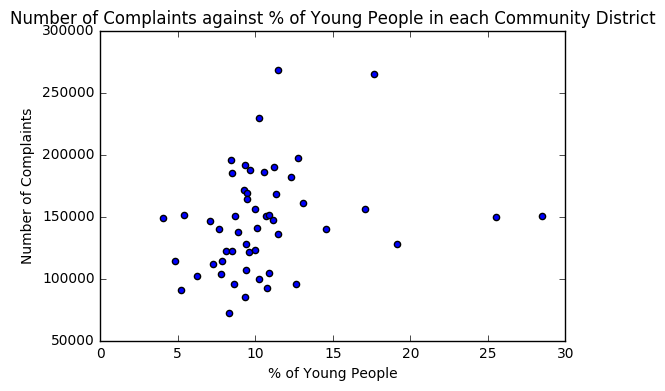

In [70]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

plt.scatter(x = '% of Young People', y = "Number of Complaints", data = df_sum)
plt.title("Number of Complaints against % of Young People in each Community District")
plt.xlabel("% of Young People")
plt.ylabel("Number of Complaints")

### We can see that, in general, as % of young people increase, the number of complaints increase. 

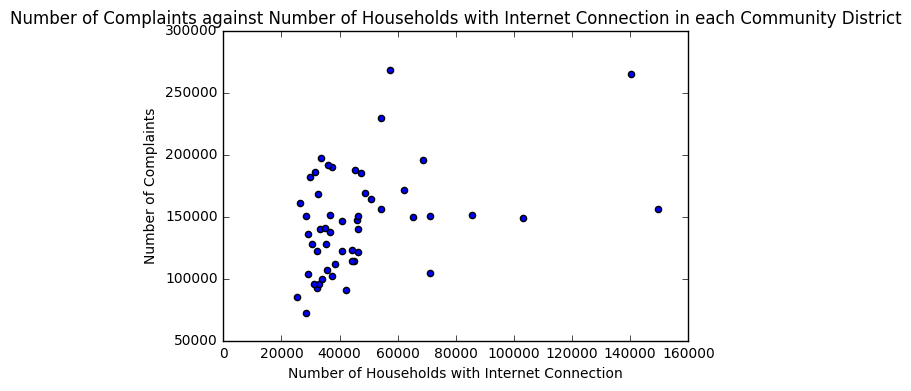

In [71]:
plt.scatter(x = 'With Internet', y = "Number of Complaints", data = df_sum)
plt.title("Number of Complaints against Number of Households with Internet Connections in each Community District")
plt.xlabel("Number of Households with Internet Connections")
plt.ylabel("Number of Complaints")

### Similarly, when the number of households with internet connections increases, the number of complaints increases. 